In [7]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import quad

n1=1000
u = np.zeros(n1)
x=np.linspace(0,1,n1)

In [8]:
for i in np.arange(n1):
    u[i] = (3*np.sqrt(3)*x[i]/2 - 
           3*np.sqrt(3)*x[i]**3/2)
du = np.zeros(n1)

for i in np.arange(n1):
    du[i] = (3*np.sqrt(3)/2 - 
           9*np.sqrt(3)*x[i]**2/2)

In [ ]:
def ue(x):
    ue= (3*np.sqrt(3)*x/2 - 
           3*np.sqrt(3)*x**3/2)
    return ue

In [16]:
def Elasticity1D_FEM(Ne,p):
    A=1.
    E=1.
    L = 1.
    he = L/Ne
    ndofs = Ne - 1


    N1e = lambda x,b:-(x-b)/he
    N2e = lambda x,a: (x-a)/he
    q = lambda x: 9*np.sqrt(3)*x

    I1 = lambda x,b: N1e(x,b)*q(x)
    I2 = lambda x,a: N2e(x,a)*q(x)
    
    #Node's coordinates
    xh = np.zeros(Ne + 1) 
    for i in np.arange(Ne + 1):
        if i == 0:
            xh[i]=0.
        else:
            xh[i]=L/Ne + xh[i-1]

    #Stiffness Matrix
    Ke = A*E*np.matrix([[1./he,-1/he],[-1/he,1./he]])

    #Force vector
    fe = np.zeros([Ne,2])
    for e in np.arange(Ne):
            fe[e,0] = quad(I1,xh[e]
            ,xh[e+1],args=(xh[e+1]))[0]
            fe[e,1] = quad(I2,xh[e]
            ,xh[e+1],args=(xh[e]))[0]

    #Assembly MAtrix
    LM = np.zeros([Ne,2]) 
    for e in np.arange(Ne):
        if e == 0:
            LM[e,0]=-1
            LM[e,1]= e

        elif e == Ne-1:
            LM[e,0]= e-1
            LM[e,1]=-1
        else:
            LM[e,0]=e-1
            LM[e,1]=e

    K = np.zeros([ndofs,ndofs])
    F = np.zeros([ndofs,1])

    #Assembly algorithm   
    for e in np.arange(Ne):
        for a in np.arange(2):
            A=int(LM[e,a])
            for b in np.arange(2):
                B=int(LM[e,b])
                if (A!=-1 and B!=-1):
                    K[A,B]=K[A,B]+Ke[a,b]
            if (A!=-1):
                for e2 in np.arange(Ne):
                    if LM[e2,a] == LM[e,a]:
                        F[A,0]=F[A,0]+fe[e2,a]

    uh = np.linalg.solve(K,F)   
    uh =np.concatenate(([[0]],uh,[[0]]))

    return uh,xh


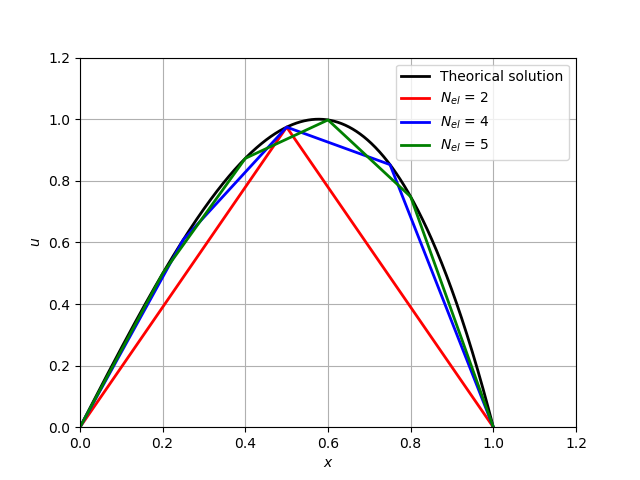

In [24]:
#====================================
# Plots
#====================================

# Number of elements, Ne = 2, 4, 16.
#====================================
Nel=[2,4,5]
color = ['r','b','g']
plt.figure()
plt.plot(x,u,'k',lw=2,label='Theorical solution')
for Ne in Nel:
    n=1000
    L=1.
    xloc=np.linspace(0,L,n)

    xh=Elasticity1D_FEM(Ne,1)[1]
    uh=Elasticity1D_FEM(Ne,1)[0]

            
    plt.grid('on')
    plt.ylim(0,1.2)
    plt.xlim(0,1.2)
    plt.ylabel('$u$')
    plt.xlabel('$x$')
    if Ne == 2:
        color = 'r'
    elif Ne == 4:
        color = 'b'
    else:
        color = 'g'
    plt.plot(xh,uh,color,lw=2,label='$N_{el}$ = '+str(Ne))
    plt.legend(loc='upper right')
plt.show()

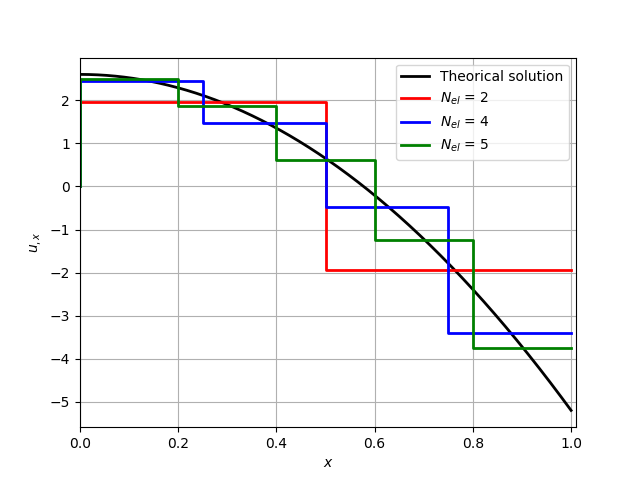

In [25]:
plt.figure()
plt.plot(x,du,'k',lw=2,label='Theorical solution')
for Ne in Nel:    

    n=1000
    L=1.
    xloc=np.linspace(0,L,n)

    xh=Elasticity1D_FEM(Ne,1)[1]
    uh=Elasticity1D_FEM(Ne,1)[0]

    duh = np.zeros(Ne)
    a = np.zeros([Ne*2 + 1,2])

    for i in np.arange(Ne):
        m = ((uh[i+1]-uh[i])
        /(xh[i+1]-xh[i]))
        duh[i] = m       

    f1 = 0
    f2 = 0
    for f in np.arange(Ne*2 + 1):
        for c in np.arange(2):
            if f==0:
                a[0,0] = xh[0]
                a[0,1] = 0
                break               
            elif c == 0:
                a[f,c] = xh[f1]
            else:
                a[f,c] = duh[f2]
        
        if f > f1*2:
            f1 += 1
        if f > f2*2 +1:
            f2 += 1                

    if Ne == 2:
        color = 'r'
    elif Ne == 4:
        color = 'b'
    else:
        color = 'g'
        
    plt.grid('on')
    plt.xlim(0,1.01)
    plt.ylabel('$u_{,x}$')
    plt.xlabel('$x$')
    plt.plot(a[:,0],a[:,1],color,lw=2,label
    ='$N_{el}$ = '+str(Ne))
    plt.legend(loc='upper right')
plt.show()